In [37]:
import numpy
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [38]:
df = pd.read_csv("dataset/train_data.csv")

In [39]:
df.isna().sum(axis=0) / len(df) * 100

BBLE                         0.000000
BORO                         0.000000
BLOCK                        0.000000
LOT                          0.000000
EASEMENT                    98.945518
OWNER                        2.293079
BLDGCL                       0.000000
TAXCLASS                     0.000000
LTFRONT                      0.000000
LTDEPTH                      0.000000
EXT                         75.035568
STORIES                      5.950289
FULLVAL                      0.000000
AVLAND                       0.000000
AVTOT                        0.000000
EXLAND                       0.000000
EXTOT                        0.000000
EXCD1                       49.820069
STADDR                       0.142271
POSTCODE                     2.945853
EXMPTCL                     98.384802
BLDFRONT                     0.000000
BLDDEPTH                     0.000000
AVLAND2                     68.482718
AVTOT2                      68.482718
EXLAND2                     90.325550
EXTOT2      

# STORIES

In [40]:
df.STORIES

0         6.0
1        23.0
2        25.0
3        27.0
4        19.0
         ... 
11944     2.0
11945     1.0
11946     1.0
11947     2.0
11948     2.0
Name: STORIES, Length: 11949, dtype: float64

In [41]:
df.STORIES.describe()

count    11238.000000
mean         5.726873
std          9.521648
min          1.000000
25%          2.000000
50%          2.000000
75%          4.500000
max         70.000000
Name: STORIES, dtype: float64

Nany oznaczają, że na danej działce nie ma żadnych budynków.

In [42]:
df[df.STORIES.isna()].BLDFRONT

10       0
45       0
118      0
119      0
126      0
        ..
11842    0
11864    0
11902    0
11913    0
11919    0
Name: BLDFRONT, Length: 711, dtype: int64

# BORO
Część nowego jorku

In [43]:
BORO_MAP = {
1:"MANHATTAN",
2: "BRONX",
3: "BROOKLYN",
4: "QUEENS",
5: "STATEN ISLAND",
}

In [44]:
df.BORO.map(BORO_MAP)

0            MANHATTAN
1            MANHATTAN
2            MANHATTAN
3            MANHATTAN
4            MANHATTAN
             ...      
11944    STATEN ISLAND
11945    STATEN ISLAND
11946    STATEN ISLAND
11947    STATEN ISLAND
11948    STATEN ISLAND
Name: BORO, Length: 11949, dtype: object

# BLOCK
id zbioru działe tworzących prostokąt

In [45]:
df.BLOCK

0         179
1          16
2          76
3          16
4         175
         ... 
11944    1670
11945    1691
11946    1696
11947    1985
11948    1980
Name: BLOCK, Length: 11949, dtype: int64

# LOT
id działki w bloku

In [46]:
df.LOT

0        1101
1        3436
2        1255
3        1179
4        1526
         ... 
11944      45
11945    1023
11946      50
11947     130
11948      44
Name: LOT, Length: 11949, dtype: int64

# BBLE

Id działki. Połączenie kolumn `BORO`, `BLOCK`, `LOT` i `EASEMENT`.

In [47]:
np.sum(df[~df.BBLE.apply(lambda x: x[-1].isdigit())].FULLVAL == 0)

66

In [48]:
df[~df.EASEMENT.isna()].EASEMENT

1037     E
1902     F
1926     E
1960     E
1991     G
        ..
11649    E
11660    E
11735    E
11800    E
11813    E
Name: EASEMENT, Length: 126, dtype: object

# Owner

In [49]:
df.groupby("TAXCLASS").describe()["FULLVAL"]

,count,mean,std,min,25%,50%,75%,max
TAXCLASS,,,,,,,,
1,5965.0,7.548925e+05,8.348953e+05,0.0,452000.0,561000.0,691000.0,27681000.0
1A,1162.0,3.054205e+05,1.567646e+05,49833.0,232427.0,285678.0,319815.0,1934280.0
1B,198.0,7.178561e+05,4.370795e+06,0.0,53250.0,166500.0,284750.0,47351000.0
1C,6.0,1.124366e+06,9.542115e+05,82636.0,398237.5,944936.5,1931194.0,2297735.0
2,2599.0,1.119612e+06,5.939224e+06,0.0,167080.5,306126.0,671522.0,158017000.0
2A,259.0,1.040774e+06,9.244757e+05,226000.0,536000.0,798000.0,1216500.0,7633000.0
2B,133.0,1.554425e+06,1.187119e+06,141000.0,865000.0,1213000.0,1823000.0,8384000.0
2C,216.0,9.623699e+05,1.463795e+06,5000.0,263901.5,554425.0,975495.5,11876000.0
3,73.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


# BIN

<AxesSubplot:>

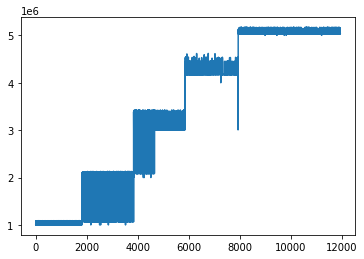

In [50]:
df[df.BIN < 1e8].BIN.plot()

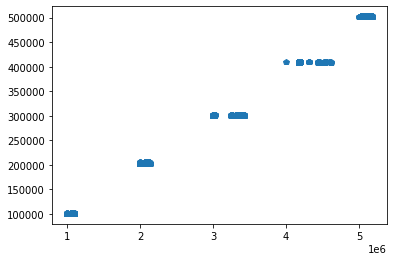

In [51]:
plt.plot(df[df.BIN < 1e8].BIN, df[df.BIN < 1e8].BBLE.apply(lambda x: float(x[:6])), 'p')

Zmienna BIN to tak naprawdę przekształcona kolumna BBLE, a konkretnie pierwsze 6 jej cyfr.

In [52]:
df.FULLVAL

0        3463000
1         247784
2         173338
3         184550
4         559937
          ...   
11944     407000
11945     244285
11946     298000
11947     459000
11948     557000
Name: FULLVAL, Length: 11949, dtype: int64

# FULLVAL i AVTOT

<AxesSubplot:xlabel='AVTOT', ylabel='FULLVAL'>

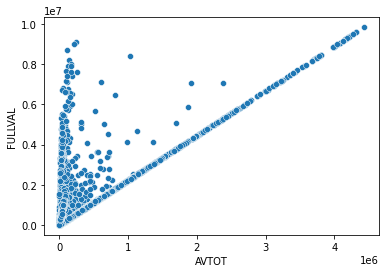

In [53]:
sns.scatterplot(data=df[df.FULLVAL < 1e7], x="AVTOT", y="FULLVAL")

<AxesSubplot:xlabel='AVTOT', ylabel='FULLVAL'>

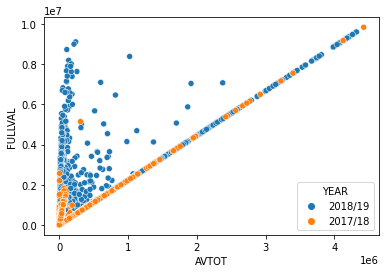

In [54]:
sns.scatterplot(data=df[df.FULLVAL < 1e7], x="AVTOT", y="FULLVAL", hue="YEAR")

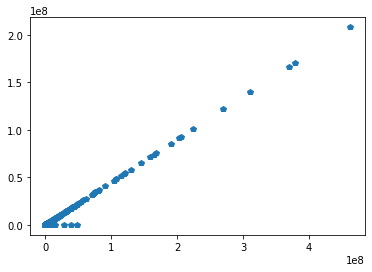

In [ ]:
plt.plot(df.FULLVAL, df.AVTOT, 'p')

(array([2.260e+02, 6.000e+00, 3.800e+01, 1.290e+02, 1.298e+03, 7.288e+03,
        2.218e+03, 6.170e+02, 1.000e+02, 2.900e+01]),
 array([ 0.        ,  1.91525699,  3.83051398,  5.74577098,  7.66102797,
         9.57628496, 11.49154195, 13.40679894, 15.32205593, 17.23731293,
        19.15256992]),
 <BarContainer object of 10 artists>)

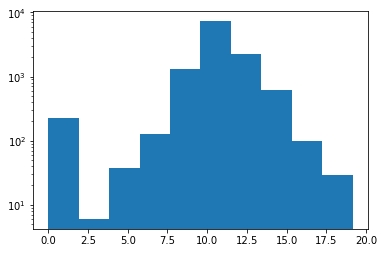

In [ ]:
plt.hist(df.AVTOT.apply(lambda x: np.log(x) if x > 0 else x), log=True)

(array([1.1914e+04, 1.5000e+01, 7.0000e+00, 4.0000e+00, 4.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 2.07900450e+07, 4.15800900e+07, 6.23701350e+07,
        8.31601800e+07, 1.03950225e+08, 1.24740270e+08, 1.45530315e+08,
        1.66320360e+08, 1.87110405e+08, 2.07900450e+08]),
 <BarContainer object of 10 artists>)

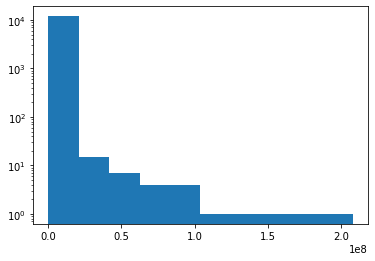

In [ ]:
plt.hist(df.AVTOT, log=True)

# 

In [ ]:
df.STORIES.fillna(0, inplace=True)

In [ ]:
df.groupby("STORIES").mean().FULLVAL

STORIES
0.0     1.230491e+06
1.0     7.673756e+05
1.2     7.220000e+05
1.5     5.840994e+05
1.6     6.268198e+05
            ...     
60.0    1.973255e+06
63.0    3.490169e+05
64.0    7.062185e+05
66.0    0.000000e+00
70.0    1.015260e+06
Name: FULLVAL, Length: 65, dtype: float64

In [ ]:
df.STORIES.unique()

array([ 6. , 23. , 25. , 27. , 19. , 10. , 11. , 31. , 40. ,  0. ,  8. ,
       44. , 42. , 38. ,  9. , 29. ,  2. , 26. , 17. , 15. ,  7. , 14. ,
        5. , 16. , 28. , 13. ,  4. , 35. ,  3. , 58. , 64. , 56. , 12. ,
       18. , 36. , 30. , 46. , 66. , 33. , 63. , 45. , 20. , 32. , 70. ,
       54. ,  4.5, 60. ,  7.5,  8.5, 50. ,  6.5,  1. , 53. , 21. ,  5.5,
        2.5,  1.5,  2.6,  3.5,  2.7,  1.7, 22. ,  3.7,  1.2,  1.6])

In [ ]:
df["BSTORIES"] = df.STORIES > 1

In [ ]:
df.groupby("BSTORIES").describe().FULLVAL

,count,mean,std,min,25%,50%,75%,max
BSTORIES,,,,,,,,
False,2130.0,9.219650e+05,8.736753e+06,0.0,185292.0,303244.0,581955.5,368983000.0
True,9819.0,1.425278e+06,1.001631e+07,0.0,366000.0,528000.0,738000.0,462001000.0


In [ ]:
df["PARTIAL"] = df.STORIES.apply(lambda x: x % 1 > 0)

In [ ]:
df.groupby("PARTIAL").describe().FULLVAL

,count,mean,std,min,25%,50%,75%,max
PARTIAL,,,,,,,,
False,11035.0,1.391713e+06,1.019706e+07,0.0,291862.5,478000.0,725430.5,462001000.0
True,914.0,6.575970e+05,4.519149e+05,0.0,528000.0,578000.0,651000.0,7407000.0


In [ ]:
df.columns

Index(['BBLE', 'BORO', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'POSTCODE', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'NTA', 'New Georeferenced Column', 'BSTORIES', 'PARTIAL'],
      dtype='object')

In [ ]:
df["NTA_VAL"] = df.NTA.map(df.groupby("NTA").mean().FULLVAL)

In [ ]:
df["BORO_VAL"] = df.BORO.map(df.groupby("BORO").mean().FULLVAL)

In [ ]:
df["BLOCK_VAL"] = df.BLOCK.map(df.groupby("BLOCK").mean().FULLVAL)

In [ ]:
df.VALTYPE.value_counts()

AC-TR    11948
AC           1
Name: VALTYPE, dtype: int64

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,BORO,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,POSTCODE,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BSTORIES,PARTIAL,NTA_VAL,BORO_VAL,BLOCK_VAL
BORO,1.000000,0.307497,-0.253576,-0.000907,0.147959,-0.507670,-0.082386,-0.056328,-0.089948,-0.032552,-0.058372,-0.618565,0.203469,-0.268144,-0.211097,-0.004490,-0.028869,-0.007774,-0.003958,-0.520039,-0.719451,-0.377115,0.999201,0.922381,0.314926,0.042911,-0.159796,0.112028,-0.226037,-0.902936,-0.098053
BLOCK,0.307497,1.000000,-0.255524,0.048949,0.139031,-0.326953,-0.048107,-0.035994,-0.051202,-0.021402,-0.034715,-0.390031,0.581599,-0.087982,-0.062334,-0.011010,-0.013011,-0.004817,0.029618,-0.123119,0.213437,0.679706,0.335203,0.017968,0.554187,0.008352,0.004857,0.428133,-0.132174,-0.513539,-0.069018
LOT,-0.253576,-0.255524,1.000000,-0.120383,-0.268596,0.372186,-0.036887,-0.023403,-0.021204,-0.011279,-0.004853,0.613201,-0.242769,-0.005612,-0.135398,-0.068786,-0.080357,-0.083868,-0.088345,-0.071375,-0.046444,-0.133755,-0.253981,-0.228623,-0.040513,-0.012417,-0.045091,-0.116477,0.079608,0.371332,-0.016458
LTFRONT,-0.000907,0.048949,-0.120383,1.000000,0.490245,-0.104559,0.300800,0.323559,0.298203,0.249815,0.292734,-0.013624,-0.001517,0.316963,0.270989,0.330005,0.313620,0.303497,0.344934,-0.057118,0.139681,0.073843,-0.008493,-0.017168,0.025463,0.001667,-0.121280,0.025169,0.013217,-0.055108,0.198209
LTDEPTH,0.147959,0.139031,-0.268596,0.490245,1.000000,-0.236694,0.199014,0.215899,0.182300,0.180015,0.198510,-0.183241,0.160643,0.114125,0.219648,0.260389,0.237331,0.256352,0.294546,0.015219,0.055493,0.089938,0.174779,0.148362,0.069939,0.008468,-0.056202,0.061566,-0.071667,-0.214897,0.166528
STORIES,-0.507670,-0.326953,0.372186,-0.104559,-0.236694,1.000000,0.079218,0.039570,0.093233,0.003175,0.048990,0.577228,-0.306098,0.312271,0.224455,-0.006207,0.036900,-0.062467,-0.036586,0.142915,0.098894,-0.023619,-0.516156,-0.492538,-0.159348,-0.019912,0.235556,-0.102074,0.140553,0.624854,0.079196
FULLVAL,-0.082386,-0.048107,-0.036887,0.300800,0.199014,0.079218,1.000000,0.732210,0.995879,0.456999,0.595883,0.038429,-0.036023,0.216475,0.275969,0.729208,0.997733,0.766153,0.981572,-0.022414,0.034300,0.008048,-0.082184,-0.072492,-0.035466,-0.003404,0.019653,-0.019907,0.361070,0.091243,0.697021
AVLAND,-0.056328,-0.035994,-0.023403,0.323559,0.215899,0.039570,0.732210,1.000000,0.735122,0.842427,0.660381,0.023953,-0.041929,0.123429,0.162823,0.998745,0.752233,0.998789,0.783870,-0.024312,0.013162,-0.004357,-0.057036,-0.053471,-0.023995,-0.002342,-0.027724,-0.016845,0.715142,0.068523,0.486522
AVTOT,-0.089948,-0.051202,-0.021204,0.298203,0.182300,0.093233,0.995879,0.735122,1.000000,0.458778,0.598955,0.059477,-0.057257,0.223978,0.276694,0.729208,0.997733,0.766153,0.981572,-0.014421,0.038996,0.003443,-0.089987,-0.083217,-0.037944,-0.003683,0.011468,-0.024383,0.363043,0.099534,0.695703
EXLAND,-0.032552,-0.021402,-0.011279,0.249815,0.180015,0.003175,0.456999,0.842427,0.458778,1.000000,0.772655,0.024358,-0.019524,0.052941,0.057672,0.848499,0.479599,0.999292,0.780376,-0.032039,0.006980,-0.002715,-0.031171,-0.028088,-0.013836,-0.001266,-0.034828,-0.010415,0.841588,0.038580,0.302351


In [ ]:
df.columns

Index(['BBLE', 'BORO', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'POSTCODE', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'NTA', 'New Georeferenced Column', 'BSTORIES', 'PARTIAL',
       'NTA_VAL', 'BORO_VAL', 'BLOCK_VAL'],
      dtype='object')

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

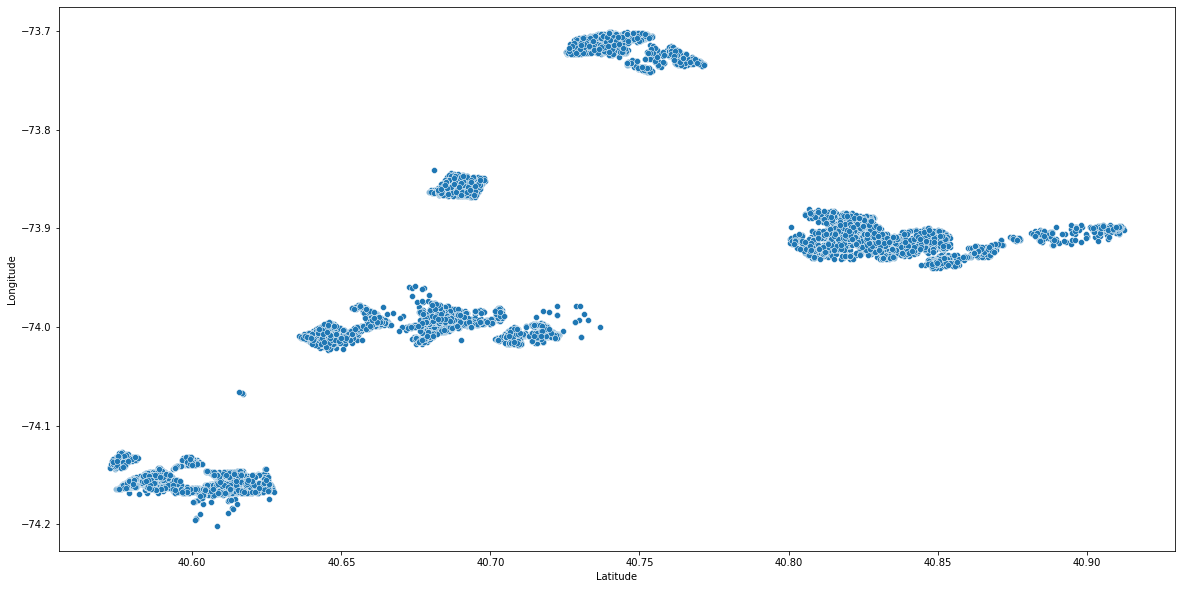

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="Latitude", y="Longitude")

In [42]:
from sklearn.cluster import DBSCAN

In [183]:
X = df.loc[:,["Latitude", "Longitude"]]

In [184]:
np.median(X["Latitude"])

nan

In [185]:
X["Latitude"] = X["Latitude"]

In [186]:
X.dropna(inplace=True)

In [187]:
db = DBSCAN(eps=0.003, min_samples=10).fit(X)

In [188]:
X["labels"] = db.labels_

(array([1855., 1871.,   43., 1024.,   81.,   26., 1659., 1061., 3567.,
         328.]),
 array([-1. ,  0.9,  2.8,  4.7,  6.6,  8.5, 10.4, 12.3, 14.2, 16.1, 18. ]),
 <BarContainer object of 10 artists>)

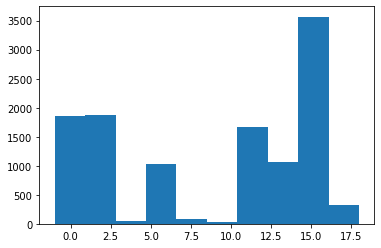

In [189]:
plt.hist(db.labels_)

In [1]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=X, x="Latitude", y="Longitude", hue="labels", palette="tab10")

NameError: name 'plt' is not defined

In [196]:
clusters = X[~(X.labels==-1)].groupby("labels").mean()

In [208]:
clusters.to_csv("clusters.csv")

In [216]:
def find_closest_cluster(point, clusters):
    if np.sum(point.isna()) > 0:
        return -1, 0
    dist = np.sqrt(np.sum((clusters - point)**2, axis=1))
    ind = np.argmin(dist)
    min_dist = np.min(dist)
    return ind, min_dist